In [7]:
import os
import sys
import keras
import numpy as np
import tensorflow as tf
from keras.optimizers import SGD

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print("TensorFlow version {}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow version 2.3.1
Eager mode:  True
Is GPU available:  True


In [8]:
class_list = ['baby','bicycle','boiling','car','carpassing','clock','dog','door','fire','glass','jackhammer','kettle','scream','siren','speech','unknown','whistle',]
num_classes = len(class_list)

etri2020_label = np.zeros((16150), int)
etri2020_train = np.zeros((16150,40,40,1), 'float32')

samsung_label = np.zeros(7004, int)
samsung_test = np.zeros((7004,40,40,1), 'float32')

iphone_label = np.zeros(7004, int)
iphone_test = np.zeros((7004,40,40,1), 'float32')

lg_label = np.zeros(7004, int)     
lg_test = np.zeros((7004,40,40,1), 'float32')

pixel_label = np.zeros(7004, int)
pixel_test = np.zeros((7004,40,40,1), 'float32')


In [11]:
etri2020_list = '/home/soonshin/sss/workplace/etri-2021/tarsosDSP/etri2020_feat/etri2020_feat_list.txt'
samsung_list = '/home/soonshin/sss/workplace/etri-2021/tarsosDSP/samsung_feat/samsung_feat_list.txt'
iphone_list = '/home/soonshin/sss/workplace/etri-2021/tarsosDSP/iphone_feat/iphone_feat_list.txt'
lg_list = '/home/soonshin/sss/workplace/etri-2021/tarsosDSP/lg_feat/lg_feat_list.txt'
pixel_list = '/home/soonshin/sss/workplace/etri-2021/tarsosDSP/pixel_feat/pixel_feat_list.txt'
use_transpose = True
use_norm = False

with open(etri2020_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        etri2020_train[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            etri2020_train[i,:,:,0] = np.transpose(etri2020_train[i,:,:,0])
        if use_norm:
            etri2020_train[i,:,:,0] = (etri2020_train[i,:,:,0] - np.min(etri2020_train[i,:,:,0])) / (np.max(etri2020_train[i,:,:,0]) - np.min(etri2020_train[i,:,:,0]))
        etri2020_label[i] = class_list.index(file.split('/')[-2])
        
print(etri2020_train.shape)
print(etri2020_label.shape)

with open(samsung_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        samsung_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            samsung_test[i,:,:,0] = np.transpose(samsung_test[i,:,:,0])
        if use_norm:
            samsung_test[i,:,:,0] = (samsung_test[i,:,:,0] - np.min(samsung_test[i,:,:,0])) / (np.max(samsung_test[i,:,:,0]) - np.min(samsung_test[i,:,:,0]))
        samsung_label[i] = class_list.index(file.split('/')[-2])
        
print(samsung_test.shape)
print(samsung_label.shape)

with open(iphone_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        iphone_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            iphone_test[i,:,:,0] = np.transpose(iphone_test[i,:,:,0])
        if use_norm:
            iphone_test[i,:,:,0] = (iphone_test[i,:,:,0] - np.min(iphone_test[i,:,:,0])) / (np.max(iphone_test[i,:,:,0]) - np.min(iphone_test[i,:,:,0]))
        iphone_label[i] = class_list.index(file.split('/')[-2])
        
print(iphone_test.shape)
print(iphone_label.shape)
        
with open(lg_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        lg_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            lg_test[i,:,:,0] = np.transpose(lg_test[i,:,:,0])
        if use_norm:
            lg_test[i,:,:,0] = (lg_test[i,:,:,0] - np.min(lg_test[i,:,:,0])) / (np.max(lg_test[i,:,:,0]) - np.min(lg_test[i,:,:,0]))
        lg_label[i] = class_list.index(file.split('/')[-2])
        
print(lg_test.shape)
print(lg_label.shape)
        
with open(pixel_list, 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        #if i%1000 == 0:
        #    print (i)
        file = lines[i].replace('\n','')
        npy = np.load(file)
        pixel_test[i,:,:,0] = npy.reshape(40,40)
        if use_transpose:
            pixel_test[i,:,:,0] = np.transpose(pixel_test[i,:,:,0])
        if use_norm:
            pixel_test[i,:,:,0] = (pixel_test[i,:,:,0] - np.min(pixel_test[i,:,:,0])) / (np.max(pixel_test[i,:,:,0]) - np.min(pixel_test[i,:,:,0]))
        pixel_label[i] = class_list.index(file.split('/')[-2])

print(pixel_test.shape)
print(pixel_label.shape)


(16150, 40, 40, 1)
(16150,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)
(7004, 40, 40, 1)
(7004,)


(40, 40)
clock


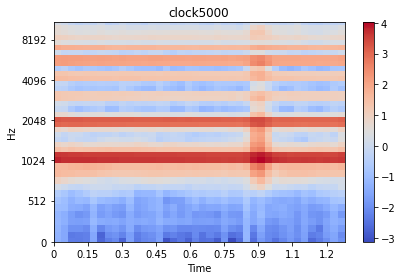

In [13]:
import librosa.display
import matplotlib.pyplot as plt

i= 5000
sample = etri2020_train[i,:,:,0]
print (sample.shape)
print (class_list[etri2020_label[i]])

librosa.display.specshow(sample, sr=16000, cmap='coolwarm', x_axis='time', y_axis='mel')
plt.title(class_list[etri2020_label[i]]+str(i))
plt.colorbar()
plt.tight_layout()
plt.show() 

In [14]:
save_path = 'model_save/mobilenet-ca-fusion-mobile-finetune.hdf5'
tflite_save_path = 'model_save/mobilenet-ca-fusion-mobile-finetune.tflite'
use_pretrained = True

if use_pretrained:
    pretrained_path = 'model_load/mobilenet-ca-fusion-mobile.hdf5'
    model = tf.keras.models.load_model(pretrained_path)

else:
    
    from networks.mobnet_fusion import model_mobnet_fusion
    model = model_mobnet_fusion(num_classes, 
                                input_shape = [40, 40, 1], 
                                num_filters = 32,
                                wd = 1e-3,
                                use_split = False)
    '''
    from networks.etri import model_etri
    model = model_etri(num_classes, 
                       input_shape = [40, 40, 1])
    
    
    from networks.resnet import model_resnet
    model = model_resnet(num_classes, 
                         input_shape = [40, 40, 1],
                         num_filters = 36,
                         kernel_size = (3,3), 
                         wd = 1e-3,
                         num_stacks = 3,
                         use_split = False)
    '''
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40, 40, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 20, 20, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 40, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 20, 20, 32)   128         conv2d[0][0]                     
_______________________________________________________________________________________

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint(save_path, 
                                             monitor = 'val_accuracy', 
                                             verbose = 1, 
                                             save_best_only = True, 
                                             mode = 'max')

In [16]:
epoch = 200

model.fit(etri2020_train, etri2020_label, 
          validation_data=(pixel_test, pixel_label), 
          epochs=epoch, 
          callbacks=checkpoint)

Epoch 1/200
505/505 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.9639
Epoch 00001: val_accuracy improved from -inf to 0.96188, saving model to model_save/mobilenet-ca-fusion-mobile-finetune.hdf5
505/505 [==============================] - 12s 23ms/step - loss: 0.5649 - accuracy: 0.9639 - val_loss: 0.5251 - val_accuracy: 0.9619
Epoch 2/200
504/505 [============================>.] - ETA: 0s - loss: 0.5060 - accuracy: 0.9842
Epoch 00002: val_accuracy improved from 0.96188 to 0.96973, saving model to model_save/mobilenet-ca-fusion-mobile-finetune.hdf5
505/505 [==============================] - 11s 22ms/step - loss: 0.5060 - accuracy: 0.9842 - val_loss: 0.4636 - val_accuracy: 0.9697
Epoch 3/200
503/505 [============================>.] - ETA: 0s - loss: 0.4849 - accuracy: 0.9899
Epoch 00003: val_accuracy did not improve from 0.96973
505/505 [==============================] - 11s 22ms/step - loss: 0.4848 - accuracy: 0.9898 - val_loss: 0.4378 - val_accuracy: 0.9634
Ep

In [17]:
model = tf.keras.models.load_model(save_path)

result1 = model.evaluate(samsung_test, samsung_label)
result2 = model.evaluate(iphone_test, iphone_label)
result3 = model.evaluate(lg_test, lg_label)
result4 = model.evaluate(pixel_test, pixel_label)

219/219 [==============================] - 1s 6ms/step - loss: 0.3383 - accuracy: 0.0597


7004 0.9830097087378641
Normalized confusion matrix


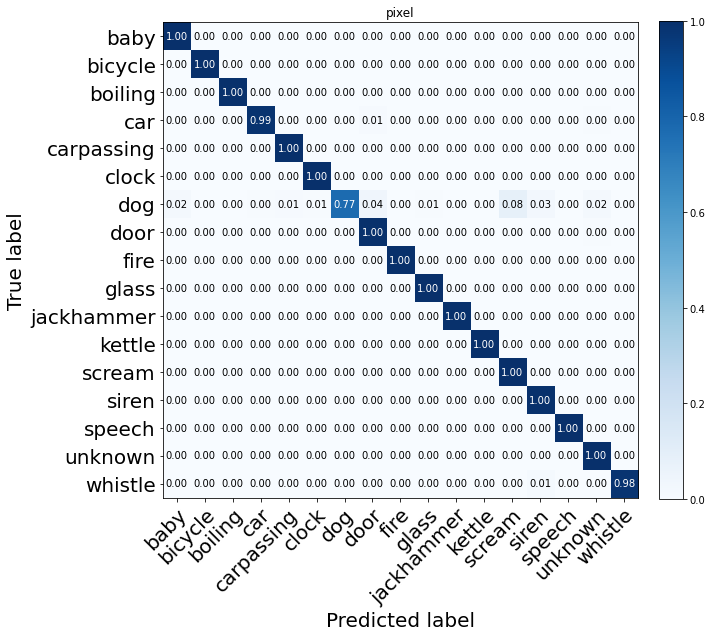

In [18]:
from plots import plot_confusion_matrix

output_prob_test = model.predict(pixel_test)
y_pred_test = np.argmax(output_prob_test, axis=1)

pixel_precision_idx = []

true = 0
precision = 0
for i in range(7004):
    precision += 1
    pixel_precision_idx.append(i)
    if y_pred_test[i] == pixel_label[i]:
        true += 1

print(precision, true/precision)

plot_confusion_matrix(pixel_label[pixel_precision_idx], y_pred_test[pixel_precision_idx], class_list, normalize=True, title="pixel")

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open(tflite_save_path, "wb") as output_file:
    output_file.write(tflite_quant_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpu2uuyvfy/assets


In [20]:
print (tflite_save_path)

model_save/mobilenet-ca-fusion-mobile-finetune.tflite
